In [1]:
import os

os.environ["JAX_PLATFORMS"] = "cpu"
os.environ["JAX_ENABLE_X64"] = "True"


In [2]:
from bpd.io import load_dataset
from bpd import DATA_DIR

import numpy as np
import arviz

import matplotlib.pyplot as plt

from numpyro.diagnostics import hpdi

/pscratch/sd/i/imendoza/miniconda3/envs/bpd_gpu/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [105]:
samples = load_dataset("/pscratch/sd/i/imendoza/data/cache_chains/exp81_53/eta_shear_samples.npz")

In [106]:
g_samples = samples['g_samples']
true_g = samples['true_g']

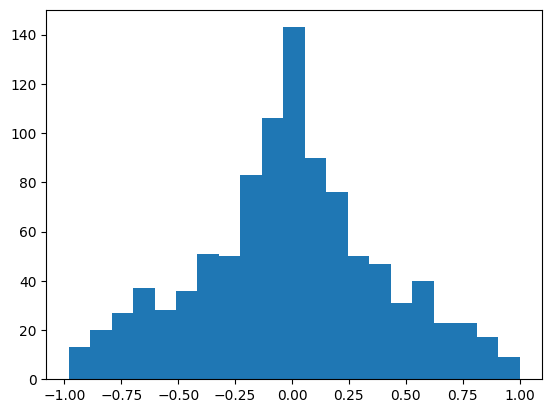

In [107]:
plt.hist(true_g[:, 0], bins=21);

In [108]:
g_samples.shape

(1000, 2000, 2)

In [109]:
g1_samples = g_samples[:, :, 0]

In [110]:
g2_samples = g_samples[:, :, 1]

In [111]:
c1.shape, g1_samples.shape

((1000,), (1000, 2000))

/tmp/ipykernel_891459/1865109687.py:2: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(true_g[:, 0], true_g[:, 0], '-', c='k', ls='--')


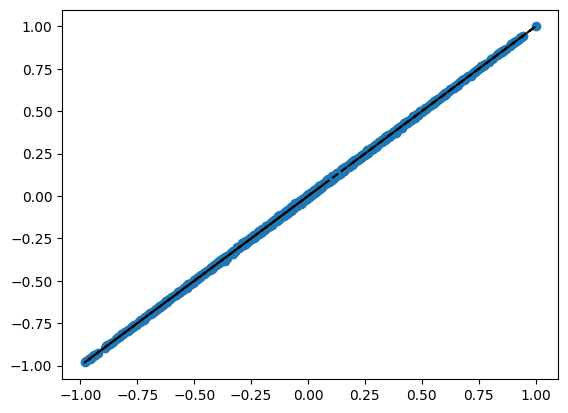

In [112]:
plt.scatter(g1_samples.mean(1), true_g[:, 0])
plt.plot(true_g[:, 0], true_g[:, 0], '-', c='k', ls='--')

In [100]:
def get_pc_fractions(samples, truth, n_bins:int=51):
    assert samples.ndim == 2 
    assert truth.ndim == 1

    ci_bins = np.linspace(0.05, 1, n_bins)  # confidence intervals
    ci_bins[-1] = 0.99  # prevent weird behavior at 1
    fractions = []
    for c in ci_bins:
        ci1, ci2 = arviz.hdi(samples.T, hdi_prob=c).T
        counts = (truth > ci1) & (truth < ci2)
        fractions.append(counts.mean().item())
    fractions = np.array(fractions)
    return fractions, ci_bins

In [123]:
fractions, ci_bins = get_pc_fractions(g1_samples, true_g[:, 0],51)
# fractions, ci_bins = get_pc_fractions(g2_samples, true_g[:, 1],51)

/tmp/ipykernel_891459/2945947747.py:9: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  ci1, ci2 = arviz.hdi(samples.T, hdi_prob=c).T
/tmp/ipykernel_891459/2945947747.py:9: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  ci1, ci2 = arviz.hdi(samples.T, hdi_prob=c).T
/tmp/ipykernel_891459/2945947747.py:9: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  ci1, ci2 = arviz.hdi(samples.T, hdi_prob=c).T
/tmp/ipykernel_891459/2945947747.py:9: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  ci1, ci2 = arviz.hdi(samples.T, hdi_prob=c).T
/tmp/ipykernel_89145

In [124]:
fractions.shape, ci_bins.shape

((51,), (51,))

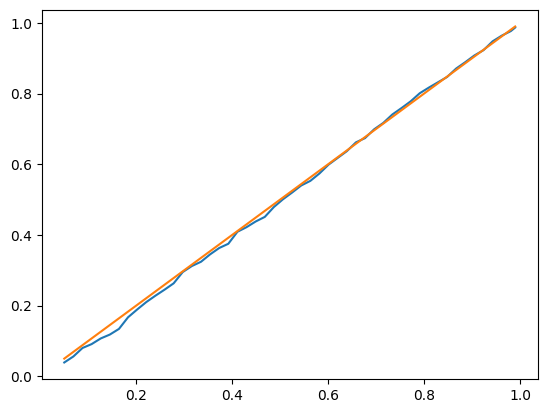

In [125]:
plt.plot(ci_bins, fractions)
plt.plot(ci_bins, ci_bins)